In [2]:
import matplotlib.pyplot as plt 
import sympy as smp 
import numpy as np
import scipy as sp
from scipy.integrate import quad

Electric field due to charge density $\rho(\vec{r})$ over volume V is given by:

$$\vec{E} = \frac{1}{4 \pi \epsilon_0} \int_{V} \frac{\rho(\vec{r}')}{|\vec{r}-\vec{r}'|^3}(\vec{r}-\vec{r}') dV'$$

means that

$$\frac{4 \pi \epsilon_0 R^2}{Q}\vec{E} = \int_{V} \frac{\rho_d(\vec{r_d}')}{|\vec{r_d}-\vec{r_d}'|^3}(\vec{r_d}-\vec{r_d}') dV_d' $$

where all the variables with $_d$ are dimensionless, and $Q$ and $R$ are the characteristic lengths and charges of the problem.

**In all problems below, the $_d$ is ommited and all quantities are assumed dimensionless**. We can thus set $R=Q=1$ in all problems (without loss of generality).



### Example 01

Spring of charge with radius $R=1$ is located at $\vec{r}'(t) = \left<\cos(4t), \sin(4t), t\right>$ for $0 \leq t \leq 2\pi$ with total charge $Q=1$ and charge evenly spread across. Plot electric field and charge

**Step 1:** Find $dq$

Since we are in 1 dimension

$$dq =  \lambda(\vec{r}')\left|\frac{d\vec{r}'}{dt}\right|dt$$

but we still need $\lambda(\vec{r}')$. Using the fact that $Q = 1 =  \int dq = \lambda \int |d\vec{r}'/dt| dt$ we get

$$\lambda = \left[ \int |d\vec{r}'/dt| dt \right]^{-1}$$

In [3]:
# define varibales and paramters 
t = smp.symbols('t',positive=True)
x,y,z = smp.symbols('x, y, z')

In [4]:
# define other variables involved 
r = smp.Matrix([x,y,z])
r_p = smp.Matrix([smp.cos(4*t),smp.sin(4*t),t])
sep = r -r_p

In [5]:
# solve for lambda 
dr_pdt = smp.diff(r_p,t).norm()
lam_inv = smp.integrate(dr_pdt,(t,0,2*smp.pi))

In [6]:
# get the integrand of E 
integrand = 1/lam_inv * dr_pdt*sep/(sep.norm())**3
integrand.simplify()

In [7]:
integrand

Matrix([
[(x - cos(4*t))/(2*pi*(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2))],
[(y - sin(4*t))/(2*pi*(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2))],
[      (-t + z)/(2*pi*(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2))]])

In [8]:
# convert sympy symbolic expression to numpy

dExdt = smp.lambdify([t,x,y,z],integrand[0])
dEydt = smp.lambdify([t,x,y,z],integrand[1])
dEzdt = smp.lambdify([t,x,y,z],integrand[2])

In [9]:
# get the E field (by integrating)

def E(x,y,z):
    return np.array([quad(dExdt,0,2*np.pi,args=(x,y,z))[0],
                     quad(dExdt,0,2*np.pi,args=(x,y,z))[0],
                     quad(dExdt,0,2*np.pi,args=(x,y,z))[0]])

In [10]:
# create a mesh to evaluate E field

x = np.linspace(-2,2,10)
y = np.linspace(-2,2,10)
z = np.linspace(0,2*np.pi,10)
xv,yv,zv = np.meshgrid(x,y,z)

In [11]:
# get the E field on a mesh(defined above)

E_field = np.vectorize(E,signature='(),(),()->(n)')(xv,yv,zv)
Ex = E_field[:,:,:,0]
Ey = E_field[:,:,:,1]
Ez = E_field[:,:,:,2]

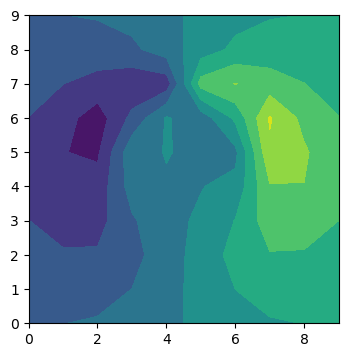

In [12]:
Ex_mid_z_plane = Ex[:,:,5]
plt.figure(figsize=(4,4))
plt.contourf(Ex_mid_z_plane)